In [1]:
# %matplotlib inline


=========================================================
Pipelining: chaining a PCA and a logistic regression
=========================================================

The PCA does an unsupervised dimensionality reduction, while the logistic
regression does the prediction.

We use a GridSearchCV to set the dimensionality of the PCA



In [1]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

Automatically created module for IPython interactive environment


In [2]:
#logistic regression
logistic = linear_model.LogisticRegression(solver='liblinear',multi_class='auto')

In [3]:
digits = datasets.load_digits()
#make sure this is scaled
X_digits = StandardScaler().fit_transform(digits.data)
y_digits = digits.target

In [5]:
# help(decomposition.PCA)

In [4]:
numcomp=10

In [6]:
X_digits.shape

(1797, 64)

In [8]:
pca = decomposition.PCA(n_components=numcomp)

In [9]:
pca.fit(X_digits)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
principalDF=pd.DataFrame(data=pca.transform(X_digits),columns=["pc"+np.str(x+1) for x in range(numcomp)])
principalDF.columns

Index(['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10'], dtype='object')

In [11]:
principalDF=pd.concat([
    pd.Series(y_digits),
    principalDF
],axis=1)
principalDF.head()

,0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,0,1.914219,-0.954479,-3.946061,2.028339,-0.266644,0.530788,-1.417987,1.497261,0.122430,-0.824238
1,1,0.588986,0.924615,3.924771,-1.779982,-0.993034,-0.672610,1.880449,0.553387,1.084369,0.088023
2,2,1.302044,-0.317162,3.023288,-2.044052,-2.079567,0.939056,-1.307077,1.159644,0.781692,-1.108832
3,3,-3.020770,-0.868789,-0.801721,-2.186931,-0.557085,0.726042,0.965300,-1.383487,0.264273,0.748174
4,4,4.528957,-1.093485,0.973111,-1.419835,-1.714306,1.434012,1.073090,-0.967985,-1.663571,1.167895


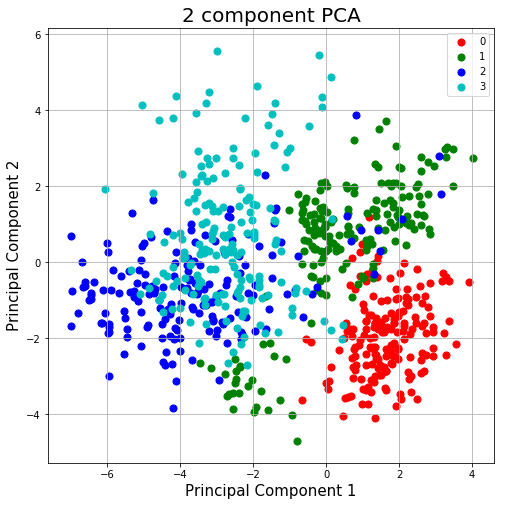

In [14]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2,3]
colors = ['r', 'g', 'b','c']
for target, color in zip(targets,colors):
    indicesToKeep = principalDF[0] == target
    ax.scatter(principalDF.loc[indicesToKeep, 'pc1']
               , principalDF.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [15]:
pca.explained_variance_ratio_ 

array([0.12033916, 0.09561054, 0.08444415, 0.06498397, 0.04860128,
       0.04213991, 0.03941719, 0.03389314, 0.02997955, 0.02931902])

Plot the PCA spectrum


Text(0, 0.5, 'explained_variance_')

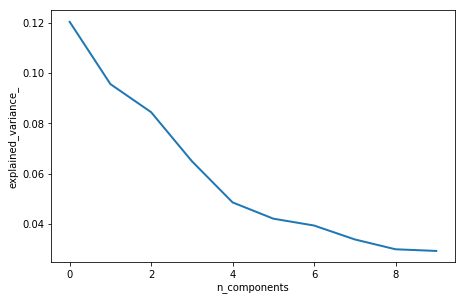

In [16]:
plt.figure(1, figsize=(8, 5))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

Prediction


In [17]:
logistic.fit(pca.transform(X_digits), y_digits)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
y_pred = logistic.predict(pca.transform(X_digits))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logistic.score(pca.transform(X_digits), y_digits)))

Accuracy of logistic regression classifier on test set: 0.88


## Grid search

In [16]:
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


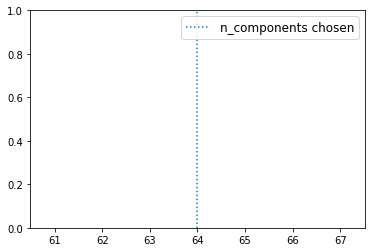

In [17]:
n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)

#Parameters of pipelines can be set using ‘__’ separated parameter names:

estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_digits, y_digits)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()